#### PCA 클래스

In [1]:
import numpy as np
fruits = np.load('../datas/fruits_300.npy')
fruits_2d = fruits.reshape(-1,100 * 100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플의 개수
    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수이다. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig , axs = plt.subplots(rows,cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n : # n 개까지만 그린다.
                axs[i,j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

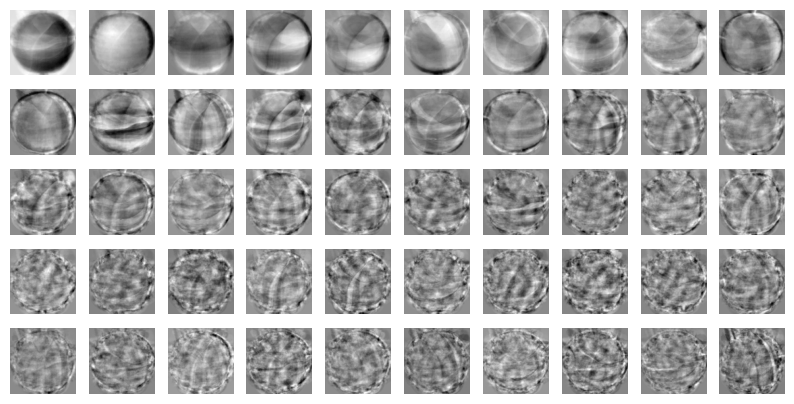

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


#### 원본 데이터 재구성

In [8]:
fruits_invers = pca.inverse_transform(fruits_pca)
print(fruits_invers.shape)

(300, 10000)


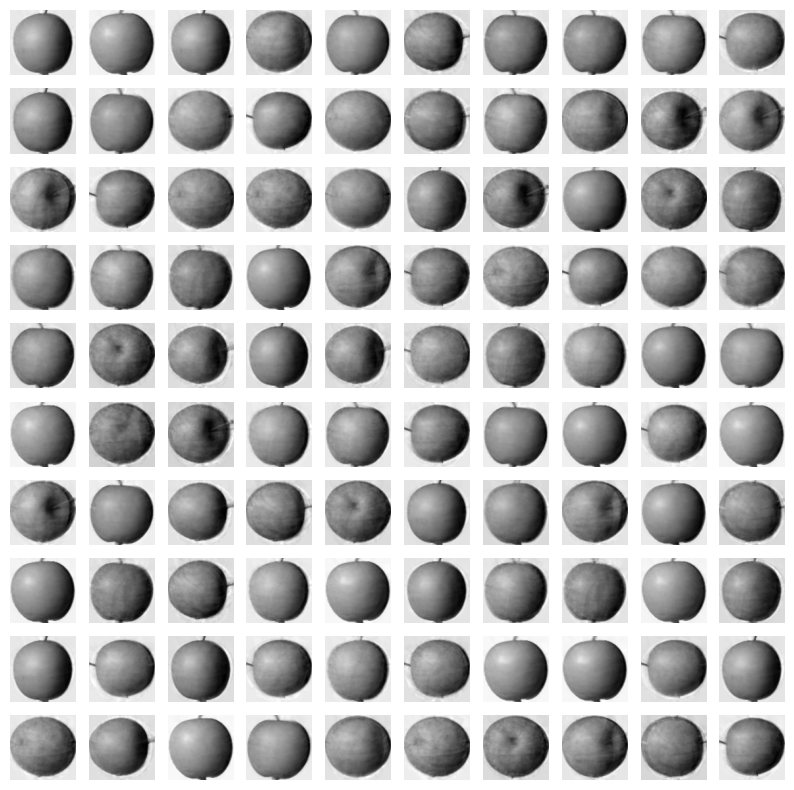

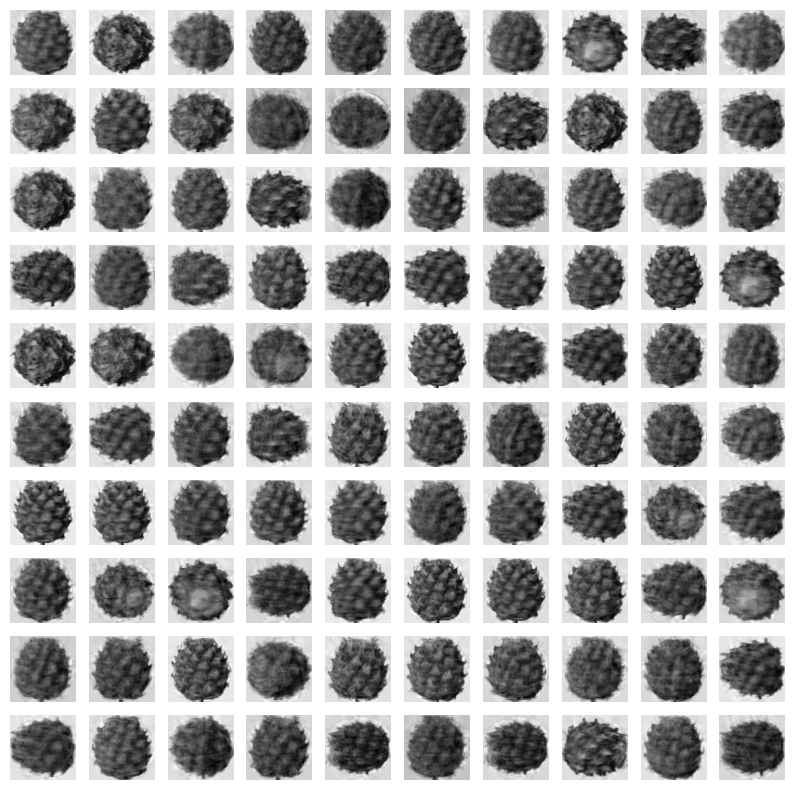

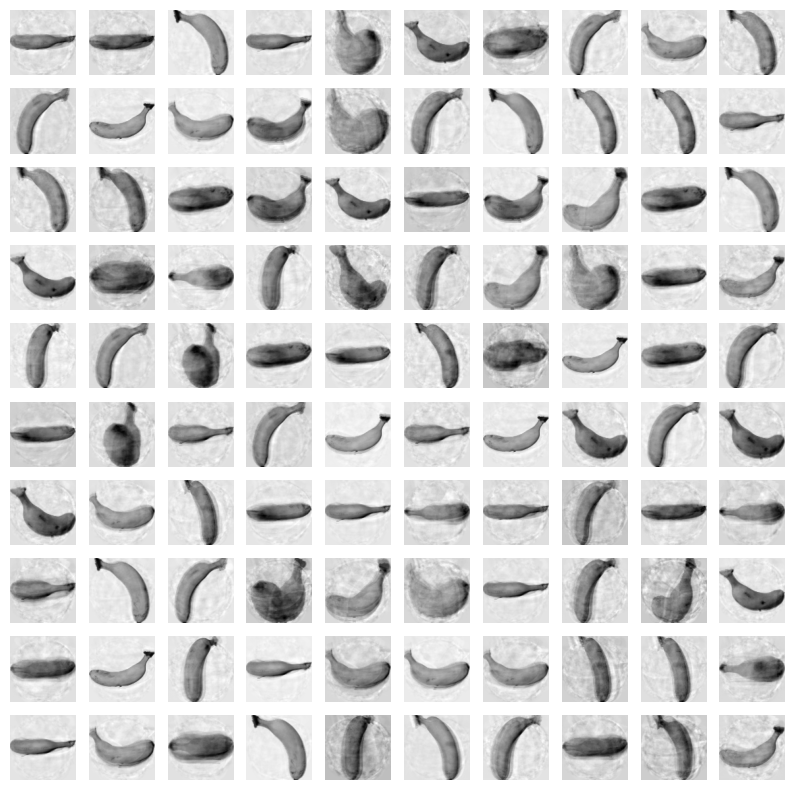

In [9]:
fruits_reconstruct = fruits_invers.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

#### 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지를 기록한 값

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9215447496949631


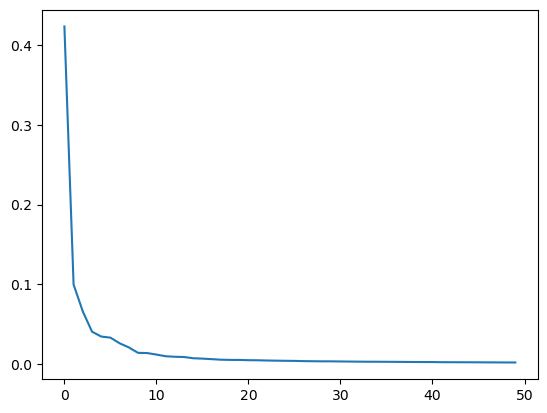

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

#### 다른 알고리즘와 함께 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [18]:
target = np.array([0] * 100 +[1] * 100+[2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.16961631774902344


In [21]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.0070037364959716795


In [22]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [23]:
print(pca.n_components_)

2


In [24]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [25]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.013106298446655274


c:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


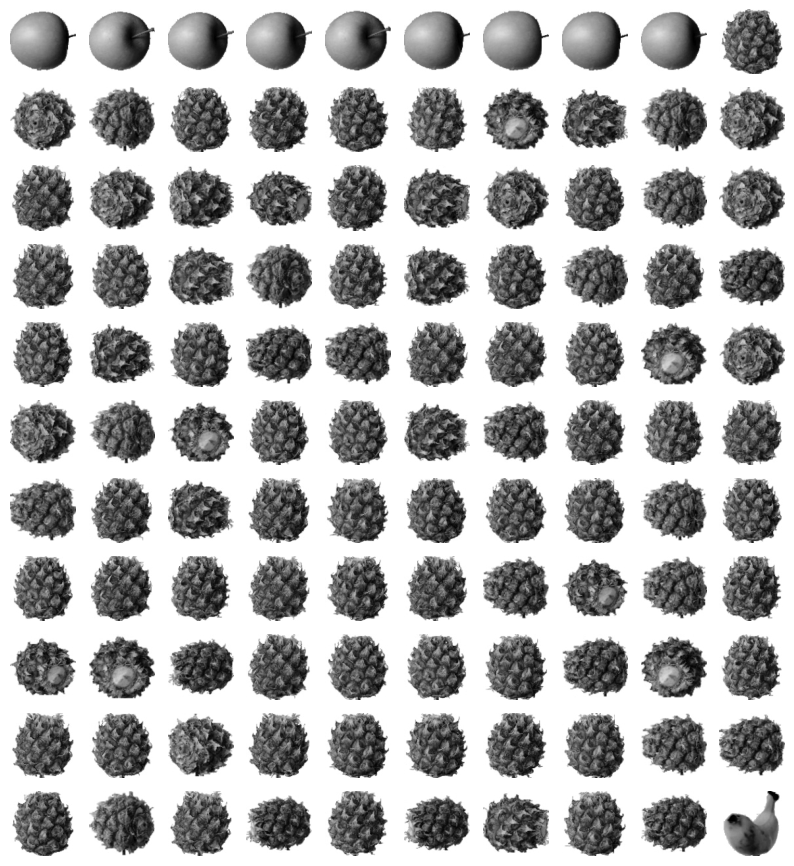

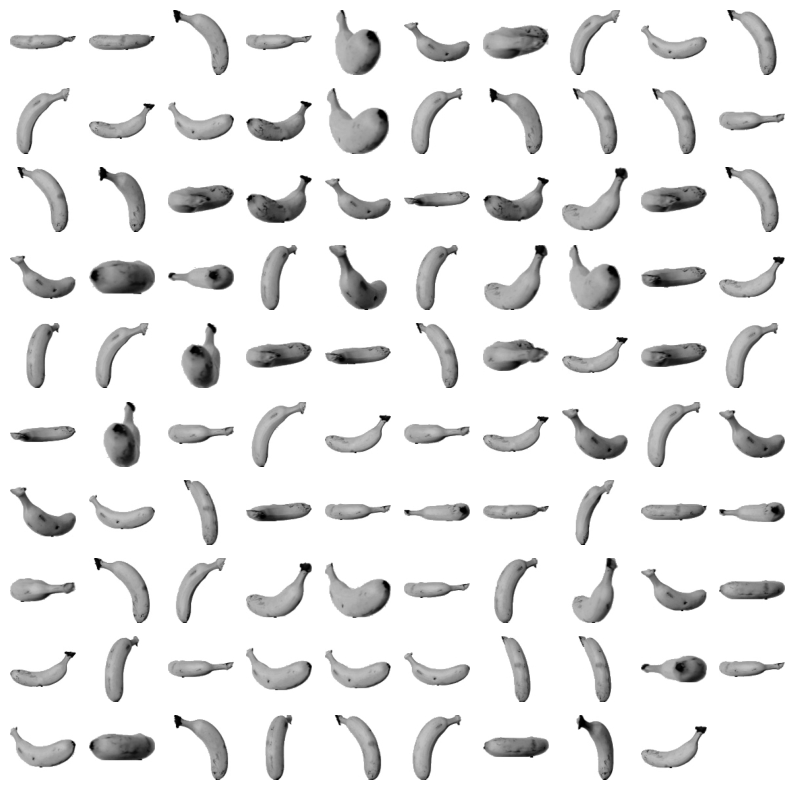

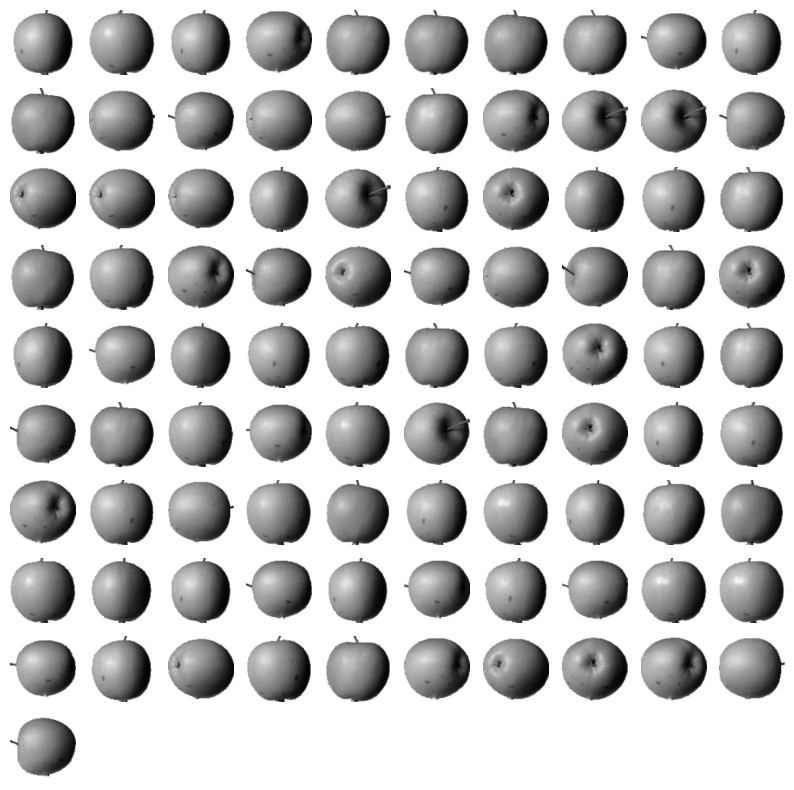

In [27]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

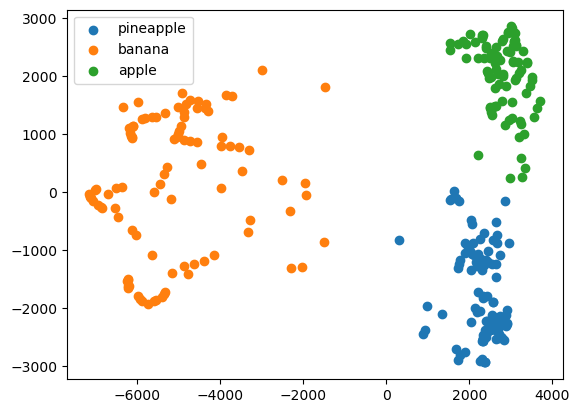

In [32]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.show()